In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
!dir ../datasets

ca-500.csv                etmgeg_279.txt            iris_test_dataset.csv
etmgeg_260.txt            iris.csv                  iris_training_dataset.csv


In [118]:
filename_260 = '../datasets/etmgeg_260.txt'
filename_279 = '../datasets/etmgeg_279.txt'

In [119]:
df_260 = pd.read_csv(filename_260, skiprows=47, low_memory=False)
df_279 = pd.read_csv(filename_279, skiprows=47, low_memory=False)

In [120]:
df_260.columns = [c.strip() for c in df_260.columns]
df_279.columns = [c.strip() for c in df_279.columns]

In [121]:
df_279

,# STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
0,279,19890101,,,,,,,,,...,,,,,,,,,,
1,279,19890102,,,,,,,,,...,,,,,,,,,,
2,279,19890103,,,,,,,,,...,,,,,,,,,,
3,279,19890104,,,,,,,,,...,,,,,,,,,,
4,279,19890105,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11805,279,20210428,43,38,42,80,18,20,3,110,...,1,84,6,5,53,73,23,31,13,31
11806,279,20210429,,,36,,,,,,...,,,,8,90,,,,,
11807,279,20210430,337,7,15,30,15,10,3,80,...,3,80,12,8,89,98,2,66,12,11
11808,279,20210501,256,33,35,70,13,10,1,100,...,3,84,11,6,81,99,3,54,13,27


In [122]:
df_279.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11810 entries, 0 to 11809
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   # STN     11810 non-null  int64 
 1   YYYYMMDD  11810 non-null  int64 
 2   DDVEC     11810 non-null  object
 3   FHVEC     11810 non-null  object
 4   FG        11810 non-null  object
 5   FHX       11810 non-null  object
 6   FHXH      11810 non-null  object
 7   FHN       11810 non-null  object
 8   FHNH      11810 non-null  object
 9   FXX       11810 non-null  object
 10  FXXH      11810 non-null  object
 11  TG        11810 non-null  object
 12  TN        11810 non-null  object
 13  TNH       11810 non-null  object
 14  TX        11810 non-null  object
 15  TXH       11810 non-null  object
 16  T10N      11810 non-null  object
 17  T10NH     11810 non-null  object
 18  SQ        11810 non-null  object
 19  SP        11810 non-null  object
 20  Q         11810 non-null  object
 21  DR        11

## Select columns of interest

In [123]:
columns = ['# STN','YYYYMMDD','TG','TN','TX']

df_260 = df_260[columns].copy()
df_279 = df_279[columns].copy()

## Data types

In [124]:
df_260.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43952 entries, 0 to 43951
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   # STN     43952 non-null  int64
 1   YYYYMMDD  43952 non-null  int64
 2   TG        43952 non-null  int64
 3   TN        43952 non-null  int64
 4   TX        43952 non-null  int64
dtypes: int64(5)
memory usage: 1.7 MB


In [125]:
df_260['dd'] = pd.to_datetime(df_260['YYYYMMDD'], format='%Y%m%d')
df_279['dd'] = pd.to_datetime(df_279['YYYYMMDD'], format='%Y%m%d')

## Rijen selecteren. Jaar 2020

In [126]:
df_260 = df_260[df_260['dd'].dt.year == 2020].copy()
df_279 = df_279[df_279['dd'].dt.year == 2020].copy()

## Samenvoegen

In [127]:
df = pd.concat([df_260, df_279]).reset_index(drop = True)

In [128]:
df

,# STN,YYYYMMDD,TG,TN,TX,dd
0,260,20200101,8,-2,18,2020-01-01
1,260,20200102,39,13,74,2020-01-02
2,260,20200103,76,43,99,2020-01-03
3,260,20200104,67,40,81,2020-01-04
4,260,20200105,69,59,76,2020-01-05
...,...,...,...,...,...,...
727,279,20201227,44,34,53,2020-12-27
728,279,20201228,35,14,58,2020-12-28
729,279,20201229,32,23,42,2020-12-29
730,279,20201230,31,12,58,2020-12-30


## Temperatuur waarden bijwerken

In [129]:
df[['TG','TN','TX']] = df[['TG','TN','TX']].astype('int') / 10

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   # STN     732 non-null    int64         
 1   YYYYMMDD  732 non-null    int64         
 2   TG        732 non-null    float64       
 3   TN        732 non-null    float64       
 4   TX        732 non-null    float64       
 5   dd        732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.4 KB


## Stations bijwerken

In [132]:
stations = {
    260: 'De Bilt',
    279: 'Hoogeveen'
}

df['station'] = df['# STN'].map(stations)

In [133]:
df

,# STN,YYYYMMDD,TG,TN,TX,dd,station
0,260,20200101,0.8,-0.2,1.8,2020-01-01,De Bilt
1,260,20200102,3.9,1.3,7.4,2020-01-02,De Bilt
2,260,20200103,7.6,4.3,9.9,2020-01-03,De Bilt
3,260,20200104,6.7,4.0,8.1,2020-01-04,De Bilt
4,260,20200105,6.9,5.9,7.6,2020-01-05,De Bilt
...,...,...,...,...,...,...,...
727,279,20201227,4.4,3.4,5.3,2020-12-27,Hoogeveen
728,279,20201228,3.5,1.4,5.8,2020-12-28,Hoogeveen
729,279,20201229,3.2,2.3,4.2,2020-12-29,Hoogeveen
730,279,20201230,3.1,1.2,5.8,2020-12-30,Hoogeveen


## Drop columns

In [139]:
df.drop(['# STN','YYYYMMDD'], axis = 1, inplace = True)

In [147]:
df

,TG,TN,TX,dd,station
0,0.8,-0.2,1.8,2020-01-01,De Bilt
1,3.9,1.3,7.4,2020-01-02,De Bilt
2,7.6,4.3,9.9,2020-01-03,De Bilt
3,6.7,4.0,8.1,2020-01-04,De Bilt
4,6.9,5.9,7.6,2020-01-05,De Bilt
...,...,...,...,...,...
727,4.4,3.4,5.3,2020-12-27,Hoogeveen
728,3.5,1.4,5.8,2020-12-28,Hoogeveen
729,3.2,2.3,4.2,2020-12-29,Hoogeveen
730,3.1,1.2,5.8,2020-12-30,Hoogeveen


## Pivot

In [144]:
df_unstacked = df.set_index(['dd', 'station']).unstack()
df_unstacked

TG                TN                TX          
station    De Bilt Hoogeveen De Bilt Hoogeveen De Bilt Hoogeveen
dd                                                              
2020-01-01     0.8       0.2    -0.2      -0.7     1.8       1.8
2020-01-02     3.9       1.8     1.3      -0.8     7.4       6.0
2020-01-03     7.6       6.7     4.3       3.3     9.9       9.1
2020-01-04     6.7       5.3     4.0       1.8     8.1       8.1
2020-01-05     6.9       5.4     5.9       1.2     7.6       7.0
...            ...       ...     ...       ...     ...       ...
2020-12-27     5.0       4.4     3.2       3.4     5.9       5.3
2020-12-28     3.6       3.5     1.3       1.4     5.4       5.8
2020-12-29     3.7       3.2     2.5       2.3     5.8       4.2
2020-12-30     4.2       3.1     2.4       1.2     6.8       5.8
2020-12-31     2.1       1.9    -2.1      -1.6     4.0       3.8

[366 rows x 6 columns]

In [148]:
data = df_unstacked['TG'].copy()
data

station,De Bilt,Hoogeveen
dd,,
2020-01-01,0.8,0.2
2020-01-02,3.9,1.8
2020-01-03,7.6,6.7
2020-01-04,6.7,5.3
2020-01-05,6.9,5.4
...,...,...
2020-12-27,5.0,4.4
2020-12-28,3.6,3.5
2020-12-29,3.7,3.2


## Plot

<AxesSubplot:xlabel='dd'>

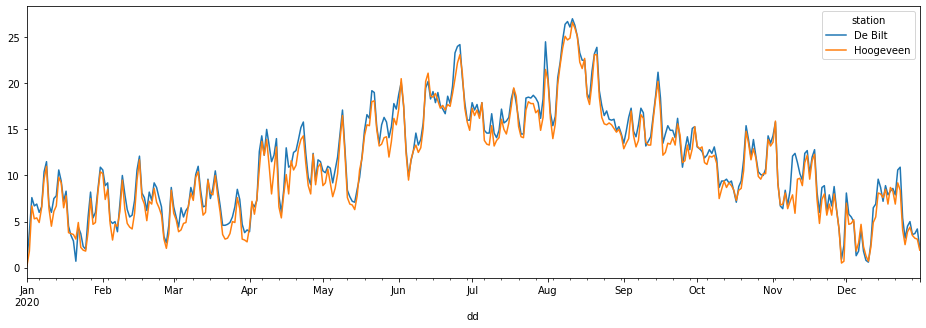

In [155]:
data.plot(kind = 'line', figsize = (16, 5))

<AxesSubplot:>

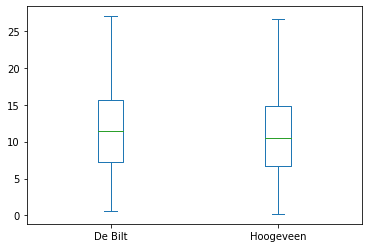

In [156]:
data.plot(kind='box')

In [157]:
data.describe()

station,De Bilt,Hoogeveen
count,366.000000,366.000000
mean,11.688251,10.928142
std,5.567863,5.529339
min,0.600000,0.200000
25%,7.300000,6.700000
50%,11.500000,10.450000
75%,15.700000,14.775000
max,27.000000,26.600000


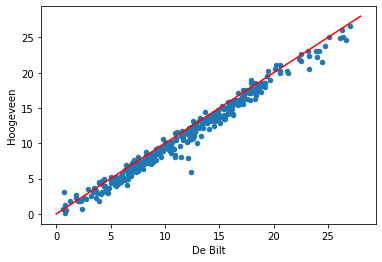

In [176]:
data.plot(kind = 'scatter', x = 'De Bilt', y = 'Hoogeveen')
plt.plot([0,28], [0,28], color = 'red')

In [177]:
dagen_kouder = np.sum(data['Hoogeveen'] < data['De Bilt'])
print(f'Het is {dagen_kouder} dagen van het jaar kouder in de Bilt')

Het is 312 dagen van het jaar kouder in de Bilt


## Temperatuurverschil

In [178]:
verschil = data['Hoogeveen'] - data['De Bilt']

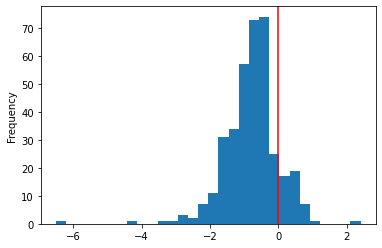

In [188]:
verschil.plot(kind = 'hist', bins = 30)
plt.axvline(0, color = 'red')

In [181]:
verschil.describe()

count    366.000000
mean      -0.760109
std        0.800920
min       -6.500000
25%       -1.175000
50%       -0.700000
75%       -0.300000
max        2.400000
dtype: float64

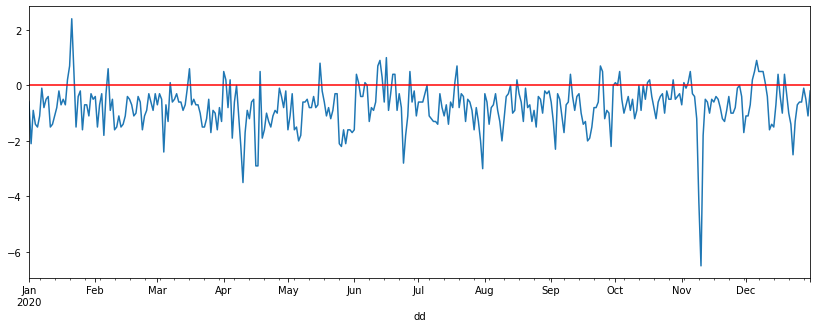

In [182]:
verschil.plot(kind = 'line', figsize = (14, 5))
plt.axhline(0, color = 'red')

## Statistiek. Student t-test

In [192]:
from scipy import stats

t, p = stats.ttest_1samp(verschil, 0)

print("The t-statistic is %.3f and the p-value is %.5f." % (t, p/2))

The t-statistic is -18.156 and the p-value is 0.00000.
